# Food Classification Using Computer Vision

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.

### Get the data

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-03-11 09:18:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  17.0MB/s    in 7.8s    

2023-03-11 09:18:59 (13.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data (Become one with it)

A very crucial steps at the beginning of any machine learning project is becoming one with the data. And for a computer vision project....this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are{len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are2 directories and 0 images in 'pizza_steak'.
There are2 directories and 0 images in 'pizza_steak/train'.
There are0 directories and 750 images in 'pizza_steak/train/pizza'.
There are0 directories and 750 images in 'pizza_steak/train/steak'.
There are2 directories and 0 images in 'pizza_steak/test'.
There are0 directories and 250 images in 'pizza_steak/test/pizza'.
There are0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names # remove .DS_store
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we will view image from here)
  target_folder = target_dir + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img





Image shape: (512, 512, 3)


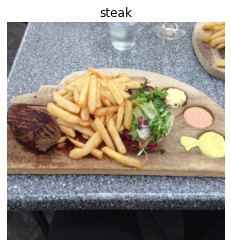

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [ ]:

# The images we have imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 74,  69,  76],
        [ 74,  69,  76],
        [ 73,  68,  75],
        ...,
        [221, 197, 133],
        [217, 192, 128],
        [217, 189, 124]],

       [[ 73,  68,  75],
        [ 72,  67,  74],
        [ 70,  65,  72],
        ...,
        [221, 193, 128],
        [212, 184, 119],
        [206, 177, 111]],

       [[ 73,  68,  75],
        [ 71,  66,  73],
        [ 69,  64,  71],
        ...,
        [210, 179, 112],
        [199, 168, 101],
        [193, 160,  91]],

       ...,

       [[ 37,  35,  36],
        [ 44,  42,  43],
        [ 52,  50,  51],
        ...,
        [ 16,  16,  24],
        [ 17,  17,  25],
        [ 18,  18,  26]],

       [[ 35,  33,  34],
        [ 41,  39,  40],
        [ 49,  47,  48],
        ...,
        [ 16,  16,  24],
        [ 17,  17,  25],
        [ 18,  18,  26]],

       [[ 32,  30,  31],
        [ 37,  35,  36],
        [ 44,  42,  43],
        ...,
        [ 16,  16,  2

In [ ]:
# View the image shape
img.shape # return width, height and colour channels

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/255.0

array([[[0.29019608, 0.27058824, 0.29803922],
        [0.29019608, 0.27058824, 0.29803922],
        [0.28627451, 0.26666667, 0.29411765],
        ...,
        [0.86666667, 0.77254902, 0.52156863],
        [0.85098039, 0.75294118, 0.50196078],
        [0.85098039, 0.74117647, 0.48627451]],

       [[0.28627451, 0.26666667, 0.29411765],
        [0.28235294, 0.2627451 , 0.29019608],
        [0.2745098 , 0.25490196, 0.28235294],
        ...,
        [0.86666667, 0.75686275, 0.50196078],
        [0.83137255, 0.72156863, 0.46666667],
        [0.80784314, 0.69411765, 0.43529412]],

       [[0.28627451, 0.26666667, 0.29411765],
        [0.27843137, 0.25882353, 0.28627451],
        [0.27058824, 0.25098039, 0.27843137],
        ...,
        [0.82352941, 0.70196078, 0.43921569],
        [0.78039216, 0.65882353, 0.39607843],
        [0.75686275, 0.62745098, 0.35686275]],

       ...,

       [[0.14509804, 0.1372549 , 0.14117647],
        [0.17254902, 0.16470588, 0.16862745],
        [0.20392157, 0

### An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need way to:
 * Load our images
 * Preprocess our images
 * Build a CNN to find patterns in our images
 * Compile our CNN
 * Fit the CNN to our training datam

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data(get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN Model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 219ms/step - loss: 0.6786 - accuracy: 0.5827 - val_loss: 0.5641 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4934 - accuracy: 0.7760 - val_loss: 0.4341 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4457 - accuracy: 0.8033 - val_loss: 0.3450 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4049 - accuracy: 0.8233 - val_loss: 0.3912 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3734 - accuracy: 0.8327 - val_loss: 0.3491 - val_accuracy: 0.8560


In [ ]:
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### Binary Classification: Let's Break it down

*  1.Become one with the data(Visualize, visualize, visualize)
*  2.Preprocess the data (prepared it for our model, the main step here was   scaling/Normalizing)
* 3.Created a model(start with a baseline)
* 4.Fit the model
* 5.Evaluate the model
* 6.Adjust different parameters and improve the model(try to beat our baseline)
* 7.Repeat until satisfied(Experiment, Experiment, Experiment)

### 1. Become one with the Data

Image shape: (384, 512, 3)
Image shape: (384, 512, 3)


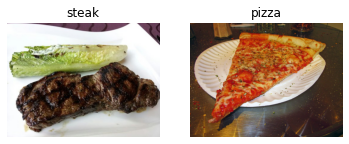

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")


### 2. Preprocess the data

In [ ]:
# Define directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is small subset of data. Rather than look at all -10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:

  1. 10,000 images (or more) might not fit into memory of your processor(GPU)
  2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data =train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224), class_mode="binary", batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# How many batches are there ?
len(train_data)

47

In [ ]:
1500/32

46.875

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [ ]:


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:

# Create the model (this will be our baseline, a layer convolutional neural network)

model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model

history_4 = model_4.fit(train_data, #this is a combination of labels and sample data
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 228ms/step - loss: 0.6487 - accuracy: 0.6713 - val_loss: 0.4611 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 11s 223ms/step - loss: 0.4298 - accuracy: 0.7987 - val_loss: 0.4278 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.2906 - accuracy: 0.8800 - val_loss: 0.5268 - val_accuracy: 0.7380
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.1395 - accuracy: 0.9633 - val_loss: 0.4651 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.0441 - accuracy: 0.9940 - val_loss: 0.4819 - val_accuracy: 0.8120


In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Evaluating our model



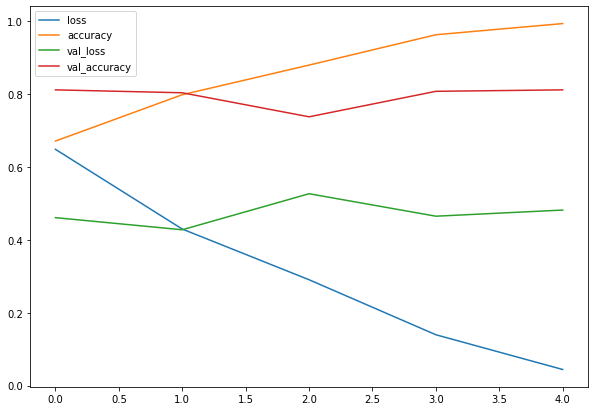

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

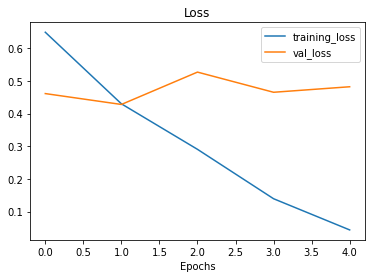

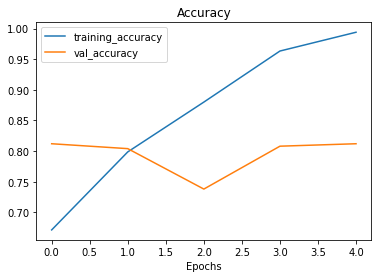

In [ ]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
 * 1.Create a baseline
 * 2.Beat the baseline by overfitting a large model
 * 3.Reduce overfitting

Ways to induce overfitting
* 1.Increase the number of conv layers
* 2.Increase the nummber of conv figsize
* 3.Add another dense layer

Reduce overfitting
* 1.Add data Augmentation
* 2.Add regularization layers(such as MaxPool2D)
* 3.Add more data...

**Note**: Reducing overfitting is also known as **regularization**.

In [ ]:
# Create the model (this is going to be our new baseline)

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model

model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 264ms/step - loss: 0.5584 - accuracy: 0.7187 - val_loss: 0.4193 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4409 - accuracy: 0.8007 - val_loss: 0.3521 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4102 - accuracy: 0.8167 - val_loss: 0.4134 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3811 - accuracy: 0.8287 - val_loss: 0.3183 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3697 - accuracy: 0.8407 - val_loss: 0.3216 - val_accuracy: 0.8680


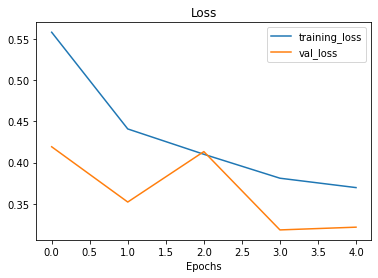

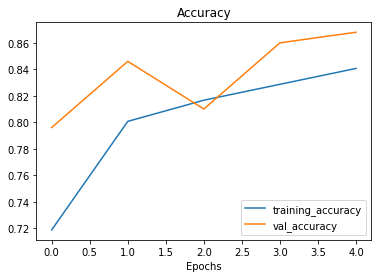

In [ ]:
# plot loss curves
plot_loss_curves(history_5)